In [69]:
#Taken from https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
# Just added plotting for 3-k cases

import numpy as np
import random
import matplotlib.pyplot as plt

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def change_coords(array):
    return list(map(list, zip(*array)))

def parse_output(data):
    clusters = data[1]
    points1 = change_coords(clusters[0])
    plt.plot(points1[0], points1[1], 'ro')
    points2 = change_coords(clusters[1])
    plt.plot(points2[0], points2[1], 'g^')
    points3 = change_coords(clusters[2])
    plt.plot(points3[0], points3[1], 'ys')
    centroids = change_coords(data[0])
    plt.plot(centroids[0], centroids[1], 'kx')
    plt.axis([-1.0, 1, -1.0, 1])
    plt.show()


[[ 0.5    0.5  ]
 [ 0.6    0.6  ]
 [-0.5   -0.5  ]
 [-0.6   -0.6  ]
 [ 0.124  0.124]
 [ 0.135  0.135]]
<class 'numpy.ndarray'>


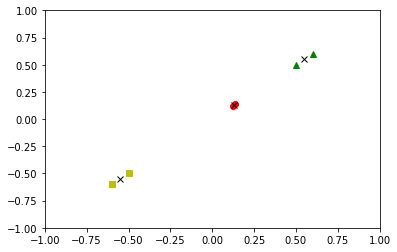

In [70]:
#data = init_board(15)
data = np.array([[0.5,0.5],[0.6,0.6],[-0.5,-0.5], [-0.6,-0.6],[0.124,0.124], [0.135,0.135]])
print(data)
print(type(data))
out = find_centers(list(data), 3)
parse_output(out)

# Q1

In [71]:
data = init_board(15)

In [77]:
data

array([[ 0.73038411,  0.65803324],
       [-0.08043188,  0.02249357],
       [-0.79224852,  0.11112534],
       [ 0.14625224,  0.68984585],
       [-0.65693708, -0.42078836],
       [-0.71445274,  0.29090867],
       [-0.61028861, -0.64360919],
       [-0.35608168,  0.97647226],
       [ 0.59069905, -0.26907263],
       [-0.12886444,  0.60965521],
       [-0.35182246, -0.48157128],
       [-0.84567155,  0.11587548],
       [-0.99127942,  0.51890159],
       [-0.1966115 , -0.11358865],
       [-0.7914752 ,  0.71065209]])

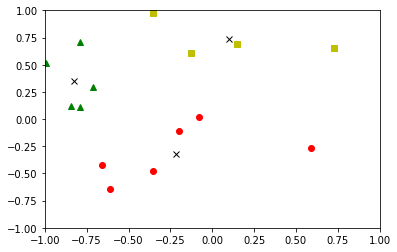

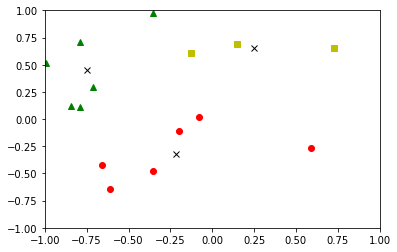

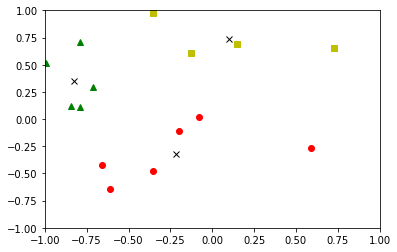

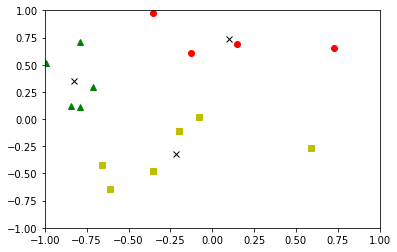

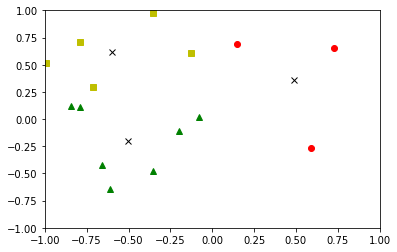

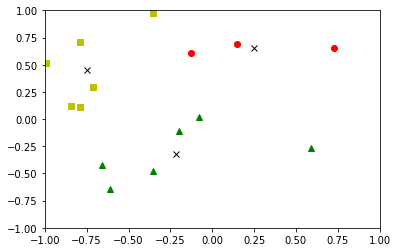

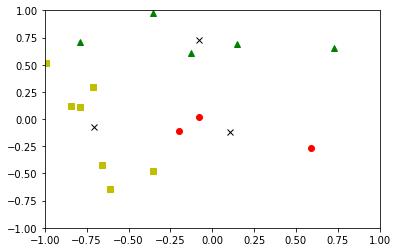

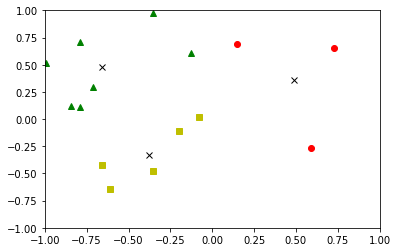

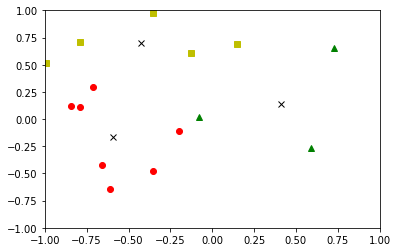

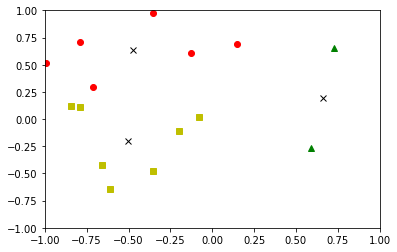

In [72]:
for i in range(10):
    out = find_centers(list(data), 3)
    parse_output(out)

In [73]:
from sklearn.cluster import KMeans

# Q2

In [74]:
data2 = np.array([[0.1,0.75],[0.05,0.8],[0.1,0.7],[0.2,0.75],[0.15,0.83],
                  [-0.75,-0.5],[-0.8,-0.2],[-0.75,-0.4],[-0.78,-0.42],[-0.82,-0.35],
                  [0.75,0.25],[0.78,0.30],[0.8,0.23],[0.65,0.25],[0.75,0.5]])

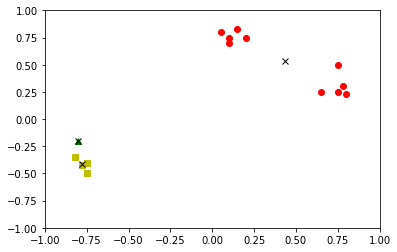

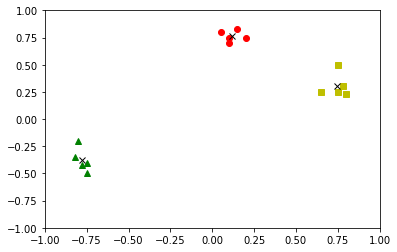

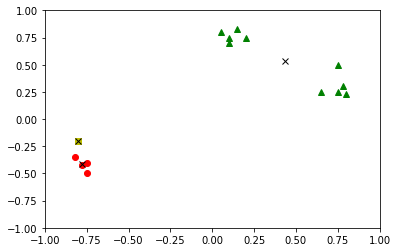

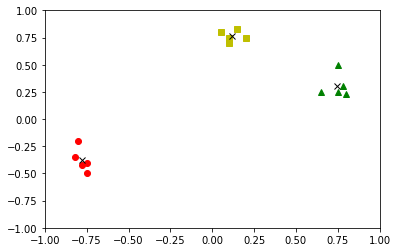

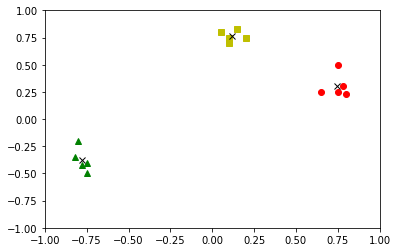

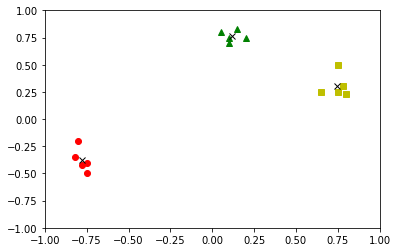

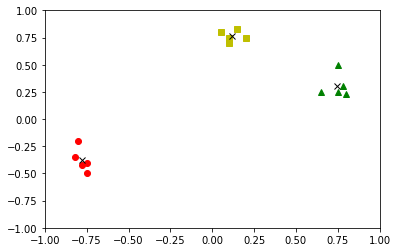

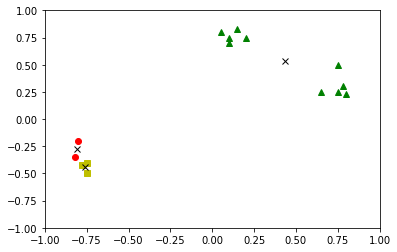

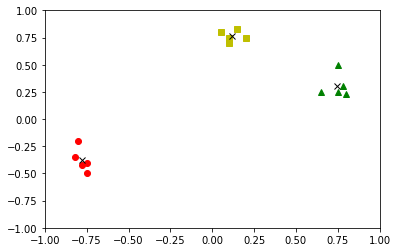

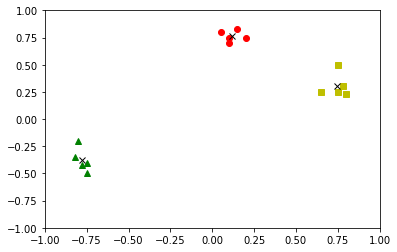

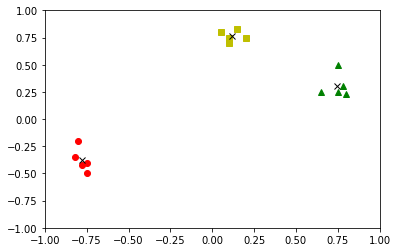

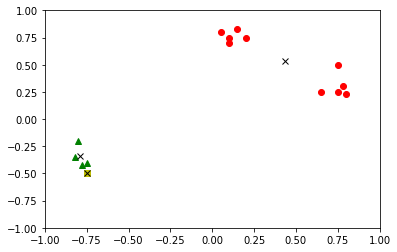

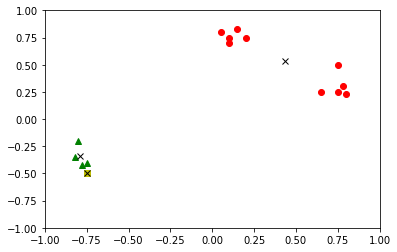

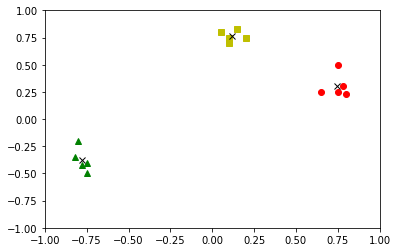

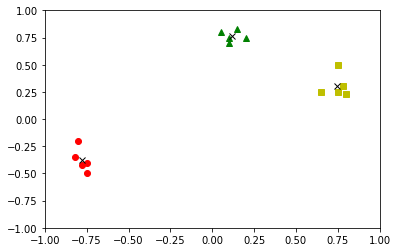

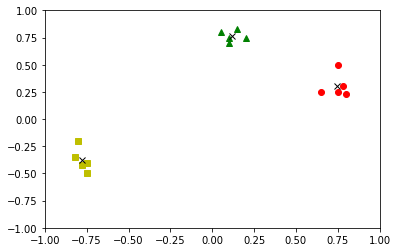

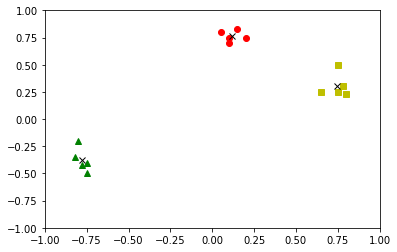

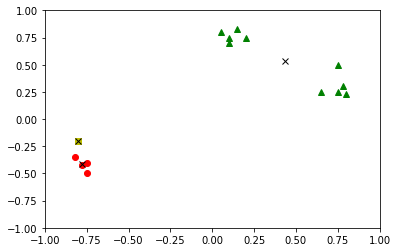

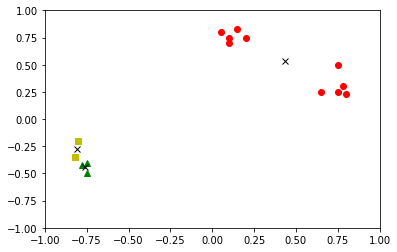

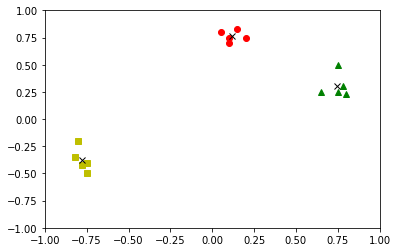

In [76]:
for i in range(20):
    out = find_centers(list(data2), 3)
    parse_output(out)

In [78]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [ ]:
+